# Influence of Rating and Reasons for unpaid Loan in Prosper Lending Company
## by Abdurrahman Kareemat

## Investigation Overview

My main interest in analysing this dataset was to understand why loans could have been defaulted and charged off. I also wanted to see features that influenced a Borrower's rate and see if the prosper rating was an effective feature in determing rate, loan amount and several other features. I was also interested in the relatonship between the loan amount and rate given.

 


## Dataset Overview

The data analysed consists of 113,066 rows in this dataset with 17 features  . Variables include loan status, prosper rating,borrower's rate, loan amount, debt to income ratio and listing category.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosper_loan_data_reviewed.csv')

#making a copy of the original df to wrangle and analyze
df1 = df.copy()

### Wrangling the data

In [3]:
#Dropping ProsperScore column and deciding to stick to the ProsperRating for analysis
df1.drop('ProsperScore',axis=1,inplace=True)

#Dropping duplicate records
df1.drop_duplicates(inplace=True)

## Converting columns to appropriate datatype

In [4]:
# Convert the "ProsperRating (Alpha)" column from a plain object type into an ordered categorical type
rating_order = ['AA','A','B','C','D','E','HR']
rating_category = pd.api.types.CategoricalDtype(ordered=True, categories=rating_order)

df1['ProsperRating (Alpha)'] = df1['ProsperRating (Alpha)'].astype(rating_category)



#Arranging the income range in ascending order
income_range_order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999'
                        ,'$75,000-99,999','$100,000+']
income_range_category = pd.api.types.CategoricalDtype(ordered=True, categories=income_range_order)
df1['IncomeRange'] = df1['IncomeRange'].astype(income_range_category)    




#The LoanStatus has a lot of past dues, so I created a new column to convert them all into single past due
df1['LoanStatusReviewed'] =df1['LoanStatus'].apply(lambda x : x.split('(')[0])

#Arranging the status in the below order
status_order = ['Completed','Current','FinalPaymentInProgress', 'Past Due','Defaulted','Chargedoff','Cancelled']
status_category = pd.api.types.CategoricalDtype(ordered=True, categories=status_order)

df1['LoanStatusReviewed'] = df1['LoanStatusReviewed'].astype(status_category)


##Converting column ListingCreationDate to a datetime datatype
df1['ListingCreationDate'] = pd.to_datetime(df1['ListingCreationDate'])


## FUNCTIONS

In [5]:
#Defining a functon for x and y-axis titles
def labels(xlabel,ylabel):
    '''Gives titles to 
       x-axis and y-axis
    '''
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    
#Writing a function to rotate xticks on facetgrid
def xtick_rot():
    '''
    Rotates the x-axis
    function of each facet
    on a FacetGrid
    '''
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(90)


#A function to label the y ticks as proportions for loan statuses
def prop_for_loan_status(dataframe,title):
    status_count = dataframe['LoanStatusReviewed'].value_counts()
    status_sum = status_count.sum()
    status_order = status_count.index
    max_status_prop = status_count[0]/status_sum
    tick_prop = np.arange(0,max_status_prop+0.05,0.05)
    tick_names = ['{:0.2f}'.format(v) for v in tick_prop]
    sb.countplot(data=dataframe,x='LoanStatusReviewed', order=status_order,color=color)
    plt.yticks(ticks=tick_prop * status_sum, labels=tick_names)  #to set the current tick locations and labels of the x-axis
    plt.ylabel('proportion')
    plt.xticks(rotation=90)
    plt.title(title);

## Frequency of each Loan Status

There were various loan statuses ranging from completed,current, defaulted, charged off and some more. Majority of loans were completed and are current but there were still significant loans that were defaulted and charged off.

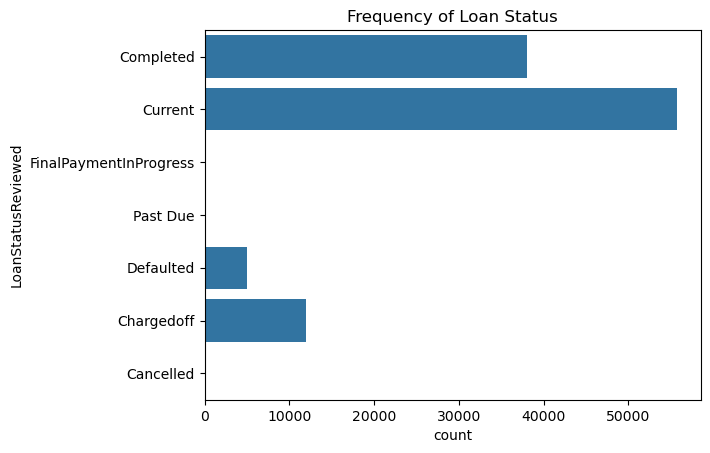

In [6]:
color = sb.color_palette()[0]
sb.countplot(data=df1,y='LoanStatusReviewed', color=color)
plt.title('Frequency of Loan Status');

## Prosper Ratings of each Loan Status

Loans that were defaulted and charged off have a higher number of low ratings i.e. 'D','E' and 'HR' in comparison to other ratings. Although for completed loan status, the highest rating is a 'D'.



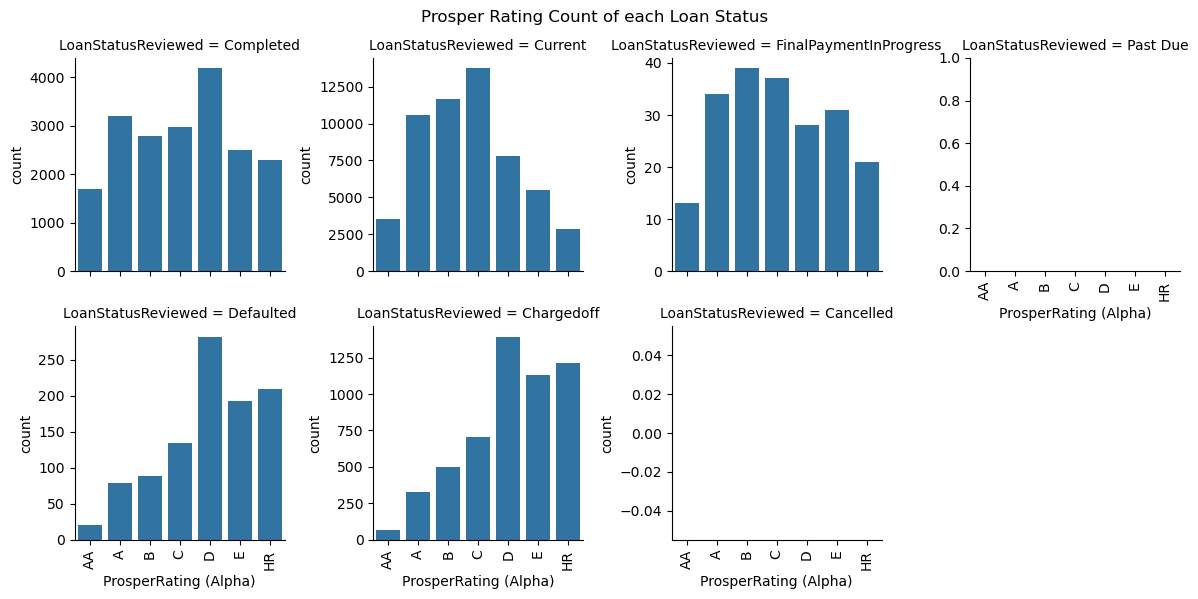

In [7]:
g = sb.FacetGrid(data=df1,col='LoanStatusReviewed',col_wrap=4,sharey=False)
g.map(sb.countplot,'ProsperRating (Alpha)')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Prosper Rating Count of each Loan Status')

xtick_rot()

##  Frequency of each Prosper Rating
Majority of Borrowers had a rating of 'C' which is an average rating. A lot of borrowers had a below average rating.

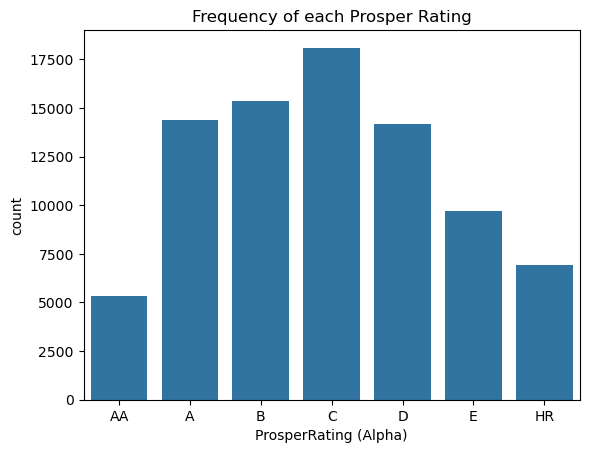

In [8]:
sb.countplot(data=df1,x='ProsperRating (Alpha)', color=color)
plt.title('Frequency of each Prosper Rating');

## Prosper's Rating vs Borrower's Rate
Borrower's who have high risk (low prosper rating) usually have a higher rate

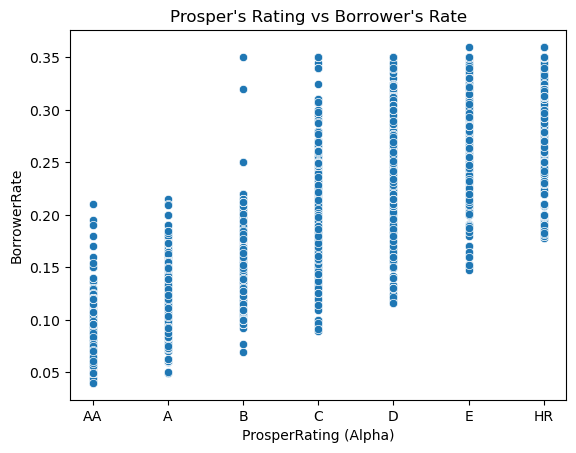

In [9]:
sb.scatterplot(data=df1, x='ProsperRating (Alpha)', y='BorrowerRate')
plt.title("Prosper's Rating vs Borrower's Rate");

## Prosper's Rating vs Debt to Income Ratio
Borrower's who have poor prosper rating have high debt to income ratio

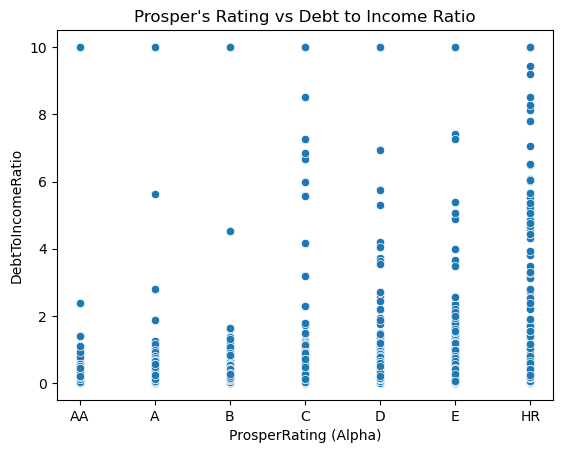

In [10]:
sb.scatterplot(data=df1, x='ProsperRating (Alpha)', y='DebtToIncomeRatio')
plt.title("Prosper's Rating vs Debt to Income Ratio");

## Prosper's Rating vs Loan Amount

Lower risk (good prosper rating)could borrower higher amounts. Higher risk rating have a maximum amount of about 17,000 dollar.

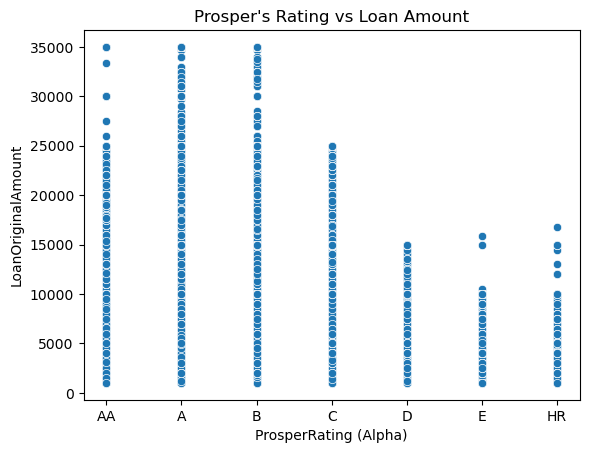

In [11]:
sb.scatterplot(data=df1, x='ProsperRating (Alpha)', y='LoanOriginalAmount')
plt.title("Prosper's Rating vs Loan Amount");

## Loan Status vs DebtToIncomeRatio for each Rating

A good number of poor ratings had high debt to income ratio and are current or have completed their loans
Few numbers of high risk and high debt to income ratio had their loans charged off or defaulted
People with good ratings majorly had low DTIR and majority are current on their loan or have completed it

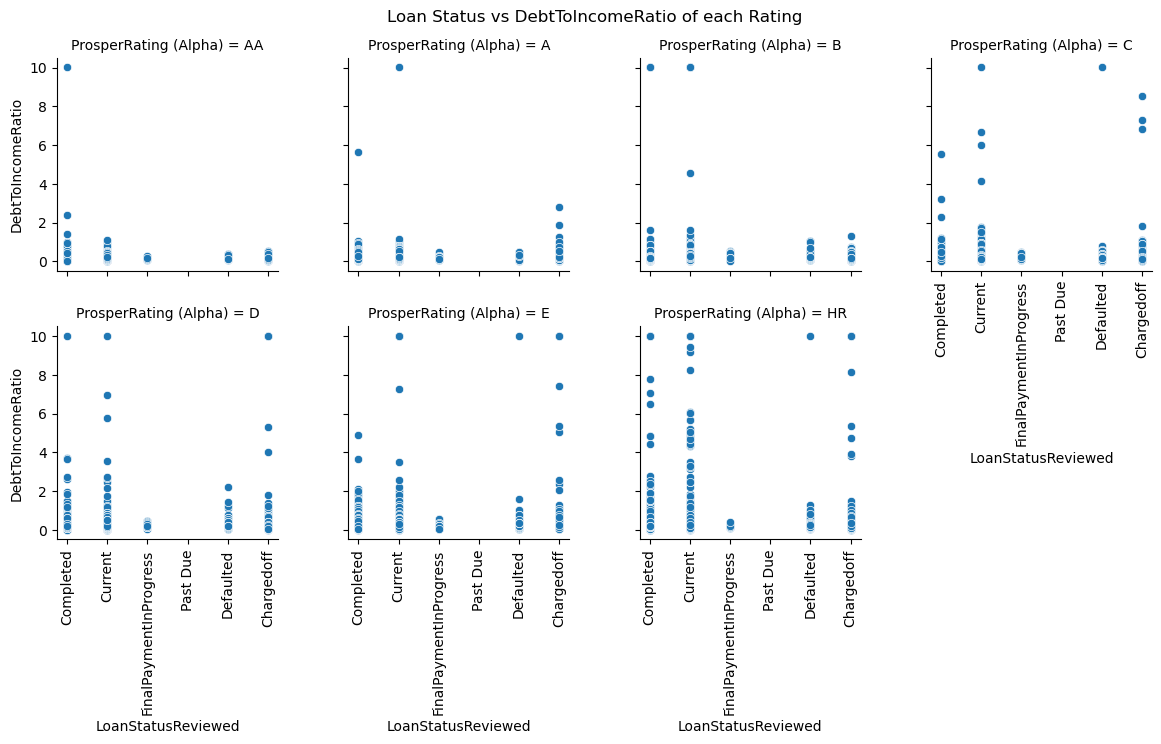

In [12]:
g = sb.FacetGrid(data=df1, col= 'ProsperRating (Alpha)',col_wrap=4)
g.map(sb.scatterplot,'LoanStatusReviewed', 'DebtToIncomeRatio')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Loan Status vs DebtToIncomeRatio of each Rating")
xtick_rot() 


### Relationship between  Income range vs Loan Amount for each Rating
 
Good ratings i.e AA TO C with high loan amount have a good number having high income range

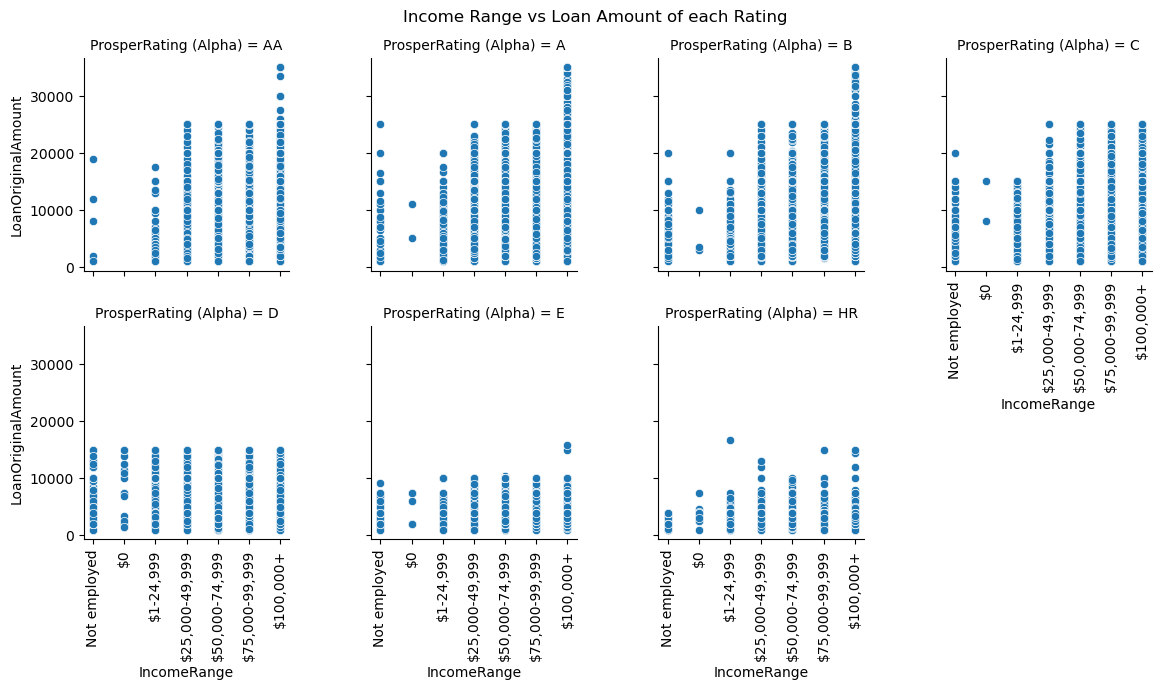

In [13]:
g = sb.FacetGrid(data=df1, col= 'ProsperRating (Alpha)',col_wrap=4)
g.map(sb.scatterplot,'IncomeRange', 'LoanOriginalAmount')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Income Range vs Loan Amount of each Rating")

xtick_rot()

## Reasons Loans were Taken (Loan Category)

0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business 7- Other

Most loans were taken out as debt consolidation followed by not available ,other, home improvement and then business


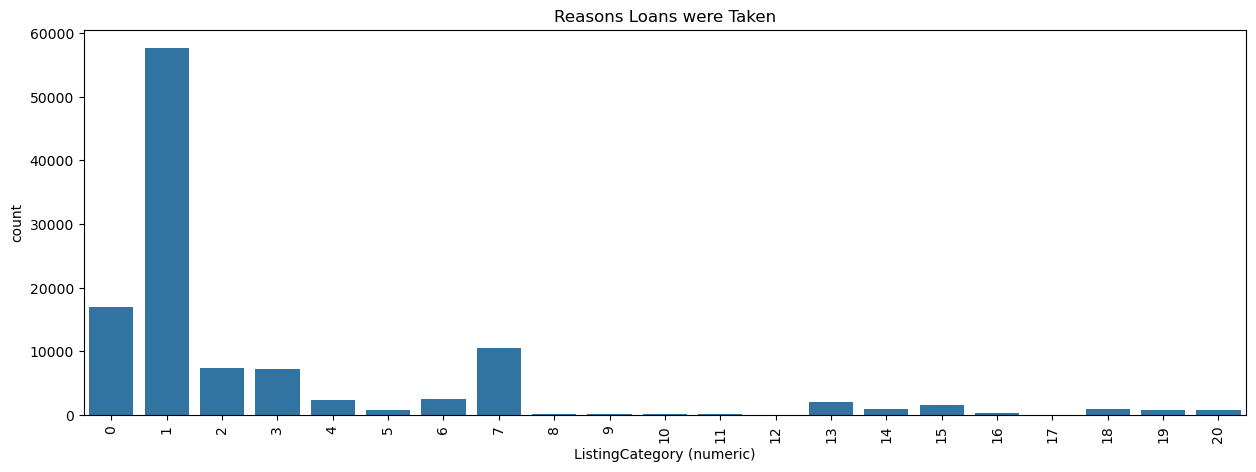

In [14]:
plt.figure(figsize=[15,5])
sb.countplot(data=df1,x='ListingCategory (numeric)',color=color)
plt.xticks(rotation=90)
plt.title("Reasons Loans were Taken"); 



## Comparison of top Listing Category with Loan Status
More proportions of business loan were charged off and defaulted
About 19.7% of people that took out loan for business were charged off and defaulted
About 10.9% of people that took out loan for home improvement were charged off and defaulted
About 8.00% of people that took out loan for debt consolidation were charged off and defaulted

In [15]:
#first we create a dataframe that only includes them
debt_cons_loan = df1[df1['ListingCategory (numeric)'] == 1]
home_improv_loan = df1[df1['ListingCategory (numeric)'] == 2]
bus_loan = df1[df1['ListingCategory (numeric)'] == 3]


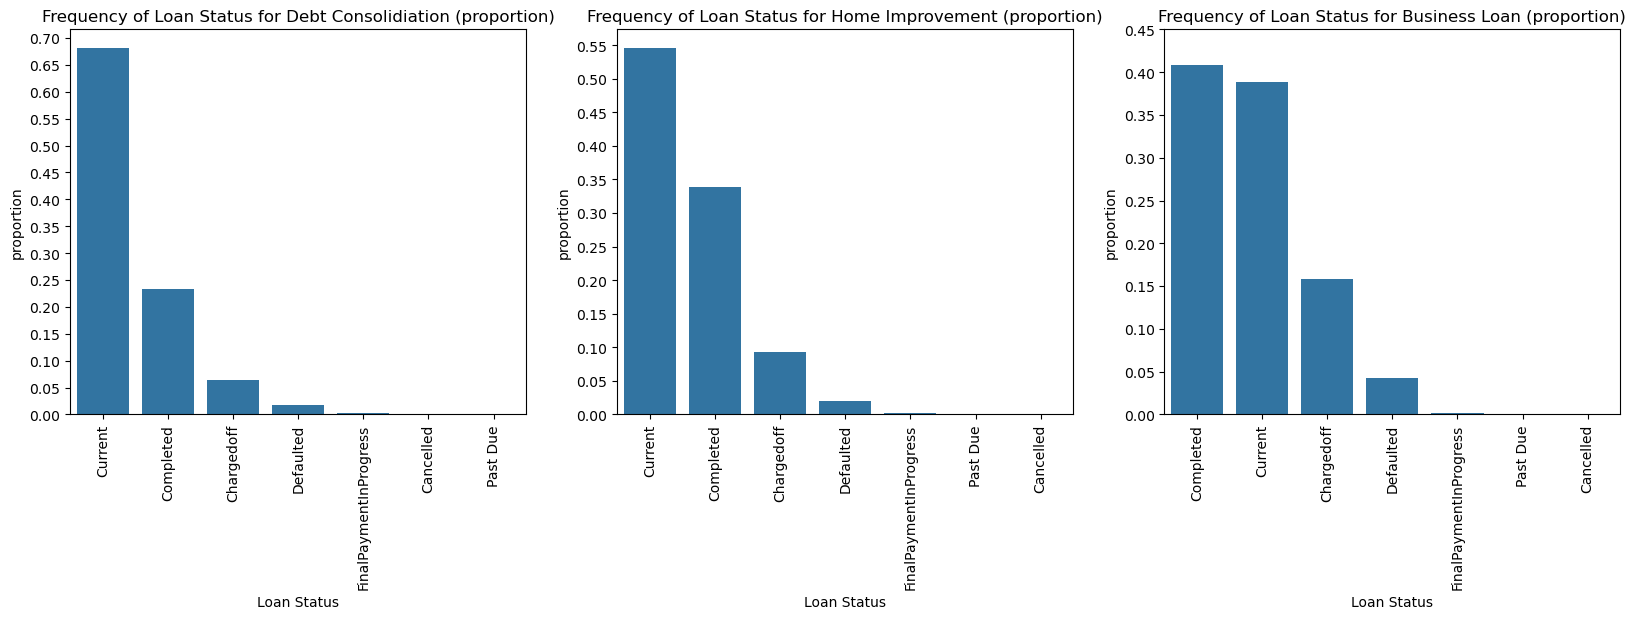

In [16]:

plt.figure(figsize=[20,5])

plt.subplot(1, 3, 1)
prop_for_loan_status(debt_cons_loan,'Frequency of Loan Status for Debt Consolidiation (proportion)')
plt.xlabel('Loan Status');

plt.subplot(1, 3, 2)
prop_for_loan_status(home_improv_loan,'Frequency of Loan Status for Home Improvement (proportion)')
plt.xlabel('Loan Status');

plt.subplot(1, 3, 3)
prop_for_loan_status(bus_loan,'Frequency of Loan Status for Business Loan (proportion)')
plt.xlabel('Loan Status');

### Comparing Improvements before and after the introduction of Prosper Rating
Prosper's Rating was a feature that introduced on 2009. Seeing the impact of this feature on their transactions.
For years greater than 2009, we can see a lesser proportion of charged and defaulted loan in comparison to years before 2009

In [17]:
#split the date column to extract the year
df1['year'] = df1['ListingCreationDate'].apply(lambda x: str(x).split('-')[0])

#Converting to year column to integer so as to btain dataframes of before and after 2009
df1['year'] =df1['year'].apply(lambda x: int(x))

#Dataframe of years befor and after 2009
years_greater_than_2009 = df1[df1['year'] >= 2009]
years_less_than_2009 = df1[df1['year'] < 2009]

## Comparing loan status before and after introduction of prosper rating
For years greater than 2009, we can see a lesser proportion of charged and defaulted loan in comparison to years before 2009

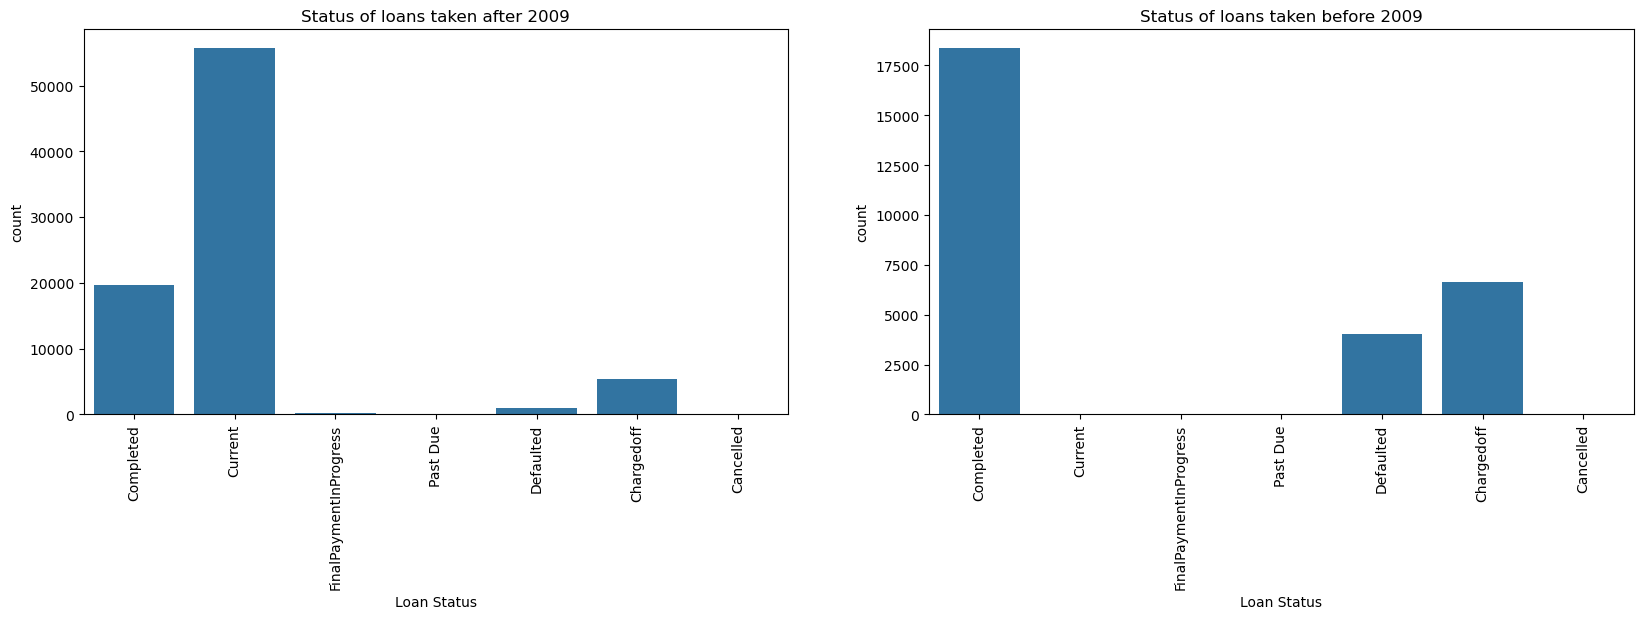

In [18]:

plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sb.countplot(data=years_greater_than_2009,x='LoanStatusReviewed',color=color)
plt.title('Greater than year 2009')
plt.xticks(rotation=90)
plt.xlabel('Loan Status')
plt.title("Status of loans taken after 2009")

plt.subplot(1,2,2)
sb.countplot(data=years_less_than_2009,x='LoanStatusReviewed',color=color)
plt.title('Less than year 2009')
plt.xticks(rotation=90)
plt.xlabel('Loan Status')
plt.title("Status of loans taken before 2009");




## Relationship between loan amount and rate before and after introduction of prosper rating

Good ratings like AA,A,B and C had lower rates and could loan higher amounts
An increase in rate was followed by lower ratings like D,E and HR

In years below 2009, we saw a couple of loan amounts with really high rate 40-50% but with years from 2009 
upward the lowest rate is about 36%

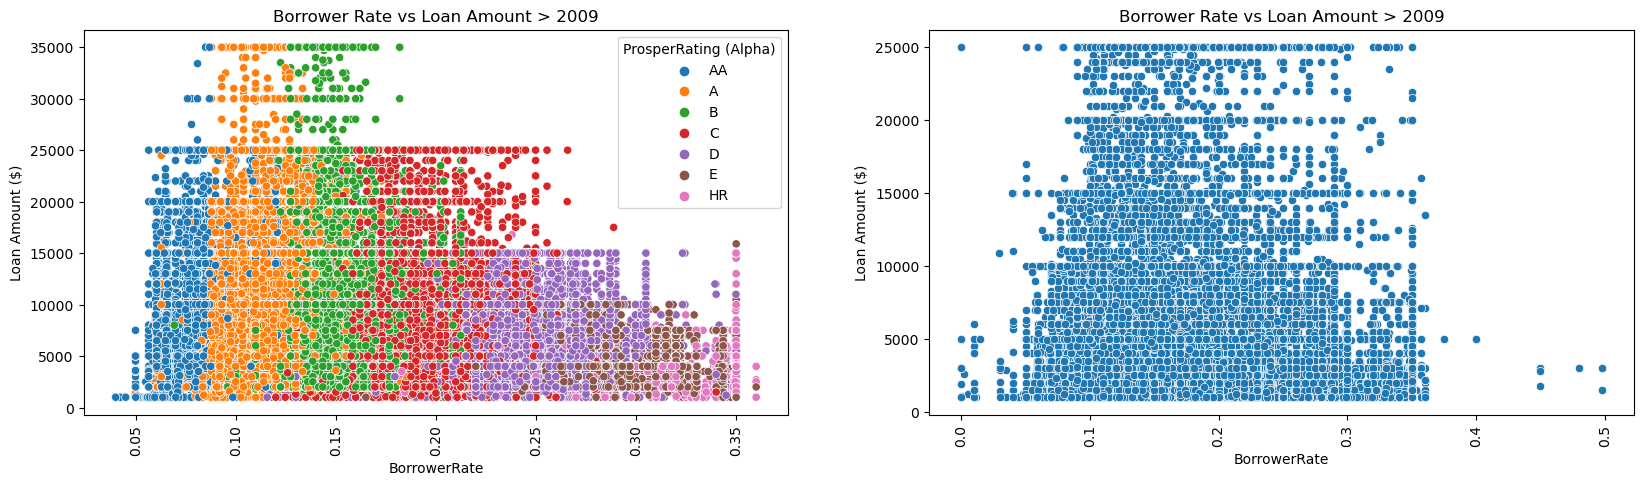

In [19]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sb.scatterplot(data=years_greater_than_2009,x='BorrowerRate',y='LoanOriginalAmount',hue='ProsperRating (Alpha)')
plt.title('Borrower Rate vs Loan Amount > 2009')
plt.ylabel('Loan Amount ($)')
plt.xticks(rotation=90);

plt.subplot(1,2,2)
sb.scatterplot(data=years_less_than_2009,x='BorrowerRate',y='LoanOriginalAmount')
plt.title('Borrower Rate vs Loan Amount > 2009')
plt.ylabel('Loan Amount ($)')
plt.xticks(rotation=90);

In [20]:
# Use this command if you are running this file in local
!jupyter nbconvert Prosper_Loan_Data_Explanation.ipynb --to slides --post serve --no-input --no-prompt

^C
